In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

amazon_df = pd.read_csv("./amz_uk_price_prediction_dataset.csv")

In [2]:
amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
#Part 1
#Frequency Tables

category_frequency_table = amazon_df['category'].value_counts()
category_frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [4]:
amazon_df['category'].value_counts().sort_values(ascending=False).head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='Count'>

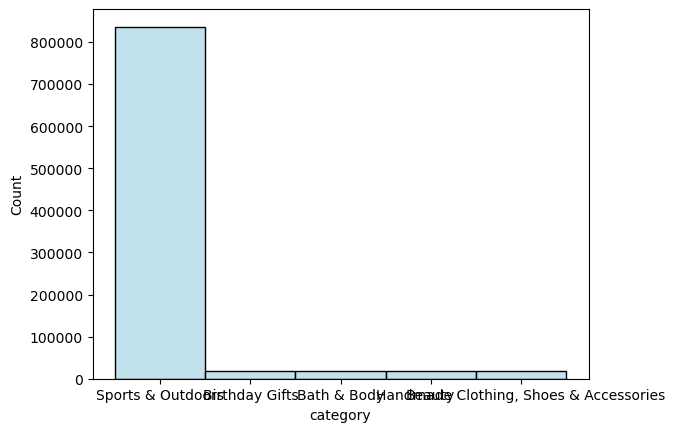

In [5]:
#Visualizations

category_counts = amazon_df['category'].value_counts()

filtered_categories = category_counts[category_counts >= 18978].index

filtered_df = amazon_df[amazon_df['category'].isin(filtered_categories)]

sns.histplot(filtered_df['category'], color="lightblue")

<Axes: ylabel='count'>

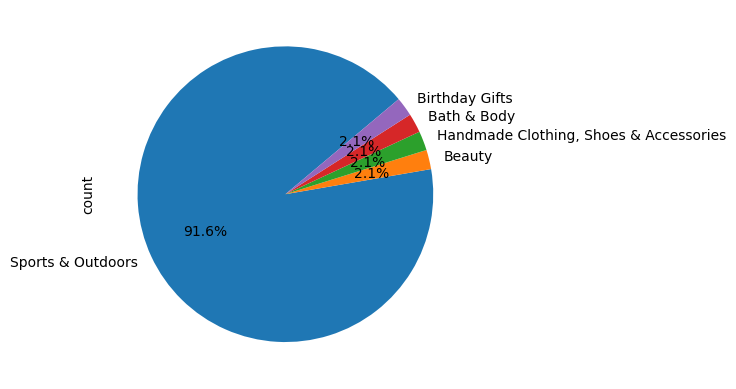

In [6]:

filtered_df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=40)

#Category "Sports & Outdoors" has an overwhelming larger amount of products than other categories. It dominates the listing.

In [7]:
#Part 2: Delving into Product Pricing
#Measures of Centrality

mean_price = amazon_df['price'].mean()
median_price = amazon_df['price'].median()
mode_price = amazon_df['price'].mode()[0]

mean_price, median_price, mode_price

#Average price is about 89 while most common price is 9.99. This means there are outliers with high pricing increasing the average.

(89.24380943923663, 19.09, 9.99)

In [8]:
#Measures of Dispersion

variance_price = amazon_df['price'].var()
std_dev_price = amazon_df['price'].std()
range_price = amazon_df['price'].max() - amazon_df['price'].min()
amazon_df['price'].quantile([0.75])
amazon_df['price'].quantile([0.25])

print(variance_price, std_dev_price, range_price)
print(amazon_df['price'].quantile([0.75]))
print(amazon_df['price'].quantile([0.25]))

#The difference between the most expensive item and the least expensive one is of 100,000,
#however, we can see that the 75th quantile is at 45.99 which mean 75% of the products are cheaper than 45.99.
#We can conclude the price points are very varied, but are mostly grouped between 0 and 45.99.

119445.48532256528 345.60886175352226 100000.0
0.75    45.99
Name: price, dtype: float64
0.25    9.99
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

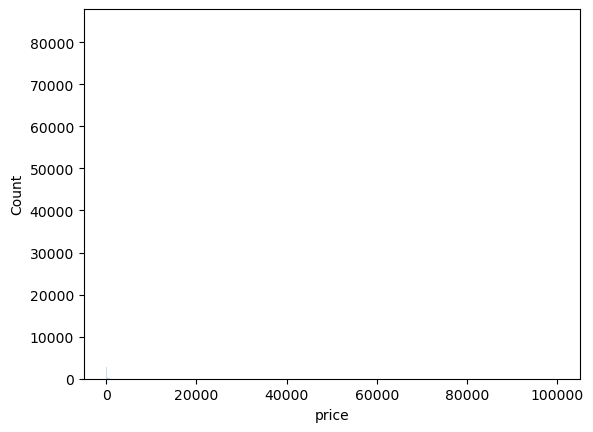

In [29]:
#Visualizations

sns.histplot(amazon_df['price'], color="lightblue")

#It is very hard to read this graph because of how spread out the price points are. We could remove outliers in order to focus on the main data range.

<Axes: ylabel='price'>

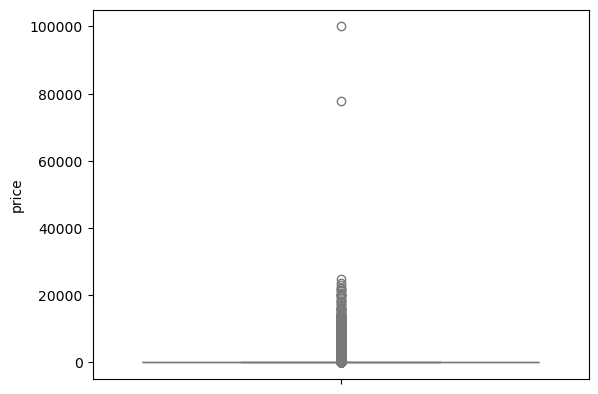

In [10]:
sns.boxplot(data = amazon_df['price'], color="lightblue")

#There are indeed outliers with a very high price.

In [14]:
#Unpacking Product Ratings
#Measures of Centrality

mean_stars = amazon_df['stars'].mean()
median_stars = amazon_df['stars'].median()
mode_stars = amazon_df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

#How do customers generally rate products? Is there a common trend?
#Overwhelming majority of customer rated 0 to the products, are both median and mode are 0. The mean is however higher than 0, confirming there are also various higher ratings.

(2.152836472966065, 0.0, 0.0)

In [22]:
#Measures of Dispersion

variance_stars = amazon_df['stars'].var()
std_dev_stars = amazon_df['stars'].std()
print(amazon_df['stars'].quantile([0.75]))
print(amazon_df['stars'].quantile([0.25]))

variance_stars, std_dev_stars

#Are the ratings consistent, or is there a wide variation in customer feedback?
#There is a wide distribution in customer feedback, all type of ratings exist. 

0.75    4.4
Name: stars, dtype: float64
0.25    0.0
Name: stars, dtype: float64


(4.81743402976196, 2.1948653785054697)

In [24]:
#Shape of the Distribution

skewness_stars = amazon_df['stars'].skew()
kurtosis_stars = amazon_df['stars'].kurtosis()

skewness_stars, kurtosis_stars

#Are the ratings normally distributed, or do they lean towards higher or lower values?
#the ratings are not skewed and seem normally distributed.

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

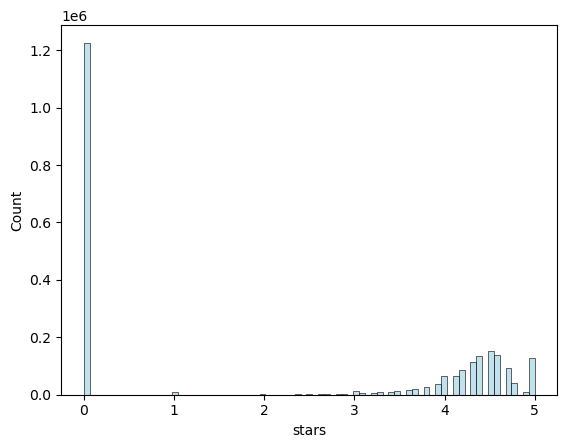

In [27]:
#Visualizations

sns.histplot(amazon_df['stars'], color="lightblue")

#Is there a specific rating that is more common?
#The rating 0 is the most common.